## Definition

**Regression problems** are supervised learning problems in which the response is continuous. **Classification problems** are supervised learning problems in which the response is categorical. **Linear regression** is a technique that is useful for predicted problems.

 linear regression pros

- widely used
- runs fast
- easy to use (not a lot of tuning required)
- highly interpretable
- basis for many other methods

## Libraries

We'll be using [Statsmodels](http://statsmodels.sourceforge.net/)  since it has some nice characteristics for linear modeling. I am also using [scikit-learn](http://scikit-learn.org/stable/) since it provides significantly more useful functionality for machine learning.

In [1]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

## Example: Advertising Data

I am taking Advertising data and then using linear regression.

In [2]:
# read data into a DataFrame
data = pd.read_csv('advertising.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


 **features**
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

**response**
- Sales: sales of a single product in a given market (in thousands of widgets)

In [3]:
# print the shape of the DataFrame
data.shape

(200, 4)

There are 200 **observations**, and thus 200 markets in the dataset.

C:\Users\user\.conda\envs\DL\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


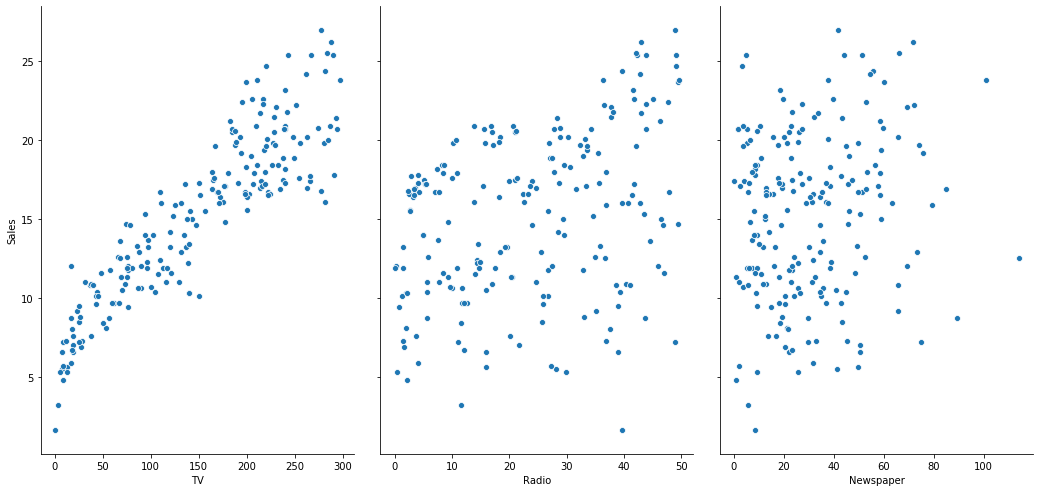

In [4]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7)

## Questions About the Advertising Data



a. Is there a relationship between ads and sales?
b. How strong is that relationship?
c. Which ad types contribute to sales?
d. What is the effect of each ad type of sales?
e. Given ad spending in a particular market, can sales be predicted?
    
**Like this we check for all sorts of relationships in the data so we can better understand.**

We will explore these questions below!

## 1.Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response/dependent/target/explained
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. we must find  the values of these coefficients. And once we've find these coefficients, we can use the model to predict Sales!

   # OR
   We may postulate the relationship between a dependent variable  and an independent variable  as\  
                                 <font><center> y=f(x)                                ------(1)</center></font>
                                              
 which indicates that the variable X is influencing the other variable Y.  Here the function    may be either a linear function or a non-linear function.  Let us confine ourselves, in this section to only a linear function.  Hence, we may write the Eq.  (1) as \
                                                          <font><center> $y = \alpha + \beta x$			(2)</center></font>
                                                          
where  and  are the unknown parameters and are very often called as intercept and slope coefficients. 

## Estimating ("Finding") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares method(ols)**, which means we will find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

### all the images are from google🙂🙂🙂🙂🙂🙂🙂🙂
![Estimating coefficients](estimating_coefficients.png)

 elements are present in the image are
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical representation of those calculations:

![Slope-intercept](slope_intercept.png)

Let's estimate the model coefficients for the advertising data:

In [5]:
### STATSMODELS ###

# create a fitted model
lm1 = smf.ols(formula='Sales ~ TV', data=data).fit()

# print the coefficients
lm1.params

Intercept    6.974821
TV           0.055465
dtype: float64

In [6]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print ("iNTERCEPT : ",lm2.intercept_)
print ("CO-EFFICIENT : ",lm2.coef_)

iNTERCEPT :  6.9748214882298925
CO-EFFICIENT :  [0.05546477]


## Interpreting Model Coefficients

 we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is **associated with** a 0.0554647 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the Sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 6.974821 + 0.05546477 \times 50$$

In [7]:
# manually calculate the prediction
6.974821 + 0.05546477*50

9.7480595

In [8]:
### STATSMODELS ###

# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})

# predict for a new observation
lm1.predict(X_new)

0    9.74806
dtype: float64

In [9]:
### SCIKIT-LEARN ###

# predict for a new observation
lm2.predict([[50]])

array([9.74806001])

Thus, we would predict Sales of **9,409 widgets** in that market.

## Plotting the Least Squares Line

Let's plot the least squares line for Sales versus each of the features:

C:\Users\user\.conda\envs\DL\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


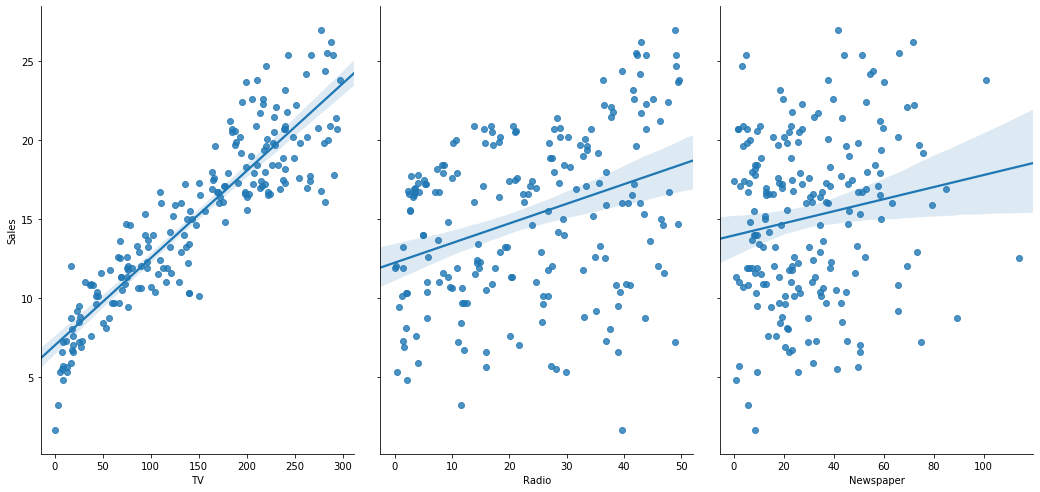

In [10]:
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

## Hypothesis Testing and p-values

Generally speaking, you start with a **null hypothesis** and an **alternative hypothesis** (that is opposite the null). Then, you check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**.

(Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that you just don't have enough data to show that.)

As it relates to model coefficients, here is the conventional hypothesis test:
- **null hypothesis:** There is no relationship between TV ads and Sales (and thus $\beta_1$ equals zero)
- **alternative hypothesis:** There is a relationship between TV ads and Sales (and thus $\beta_1$ is not equal to zero)

How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval **does not include zero**. Conversely, the **p-value** represents the probability that the coefficient is actually zero:


**Fun Fact**: Why  statisticians always assume and reek for nullhypothesis in the first place is if we accept the **NH** the work is done, if not **AH** is accepted statistician need do all the calculations which are lengthy, everyone knows statisticians are lazy. 

In [11]:
### STATSMODELS ###

# print the p-values for the model coefficients
lm1.pvalues

Intercept    5.027719e-54
TV           7.927912e-74
dtype: float64

A **p-value less than 0.05** is one way to decide whether there is likely a relationship between the feature and the response.

In this case, the p-value for TV is far less than 0.05, and so we **believe** that there is a relationship between TV ads and Sales.

we generally don't consider the p-value for the intercept.

## How Well Does the Model Fit the data?

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model.

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. Here's an example of what R-squared "looks like":

![R-squared](r_squared.png)

You can see that the **blue line** explains some of the variance in the data (R-squared=0.54), the **green line** explains more of the variance (R-squared=0.64), and the **red line** fits the training data even further (R-squared=0.66). 

Now calculating the R-squared value for our simple linear model:

In [12]:
### STATSMODELS ###

# print the R-squared value for the model
print("StatModel R-Square Value",lm1.rsquared)

StatModel R-Square Value 0.8121757029987414


In [13]:
### SCIKIT-LEARN ###

# print the R-squared value for the model
print("SkLearn R-Square Value",lm2.score(X, y))

SkLearn R-Square Value 0.8121757029987413


The number for a good R-squared value depends widely on the domain. Therefore, it's most useful for **comparing different models**.

## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$



In [14]:
### STATSMODELS ###

# create a fitted model with all three features
lm1 = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()

# print the coefficients
lm1.params

Intercept    4.625124
TV           0.054446
Radio        0.107001
Newspaper    0.000336
dtype: float64

In [15]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data.Sales

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print (lm2.intercept_)
print (lm2.coef_)

4.625124078808653
[0.05444578 0.10700123 0.00033566]


In [16]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm2.coef_))

[('TV', 0.05444578033757093),
 ('Radio', 0.10700122823870299),
 ('Newspaper', 0.0003356579223305887)]

For a given amount of Radio and Newspaper ad spending, an **increase of $1000 in TV ad spending** is associated with an **increase in Sales of 54.4457 widgets**.

In Statsmodels model summary output we can see all statistical measures.

In [17]:
### STATSMODELS ###

# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Mon, 21 Oct 2019   Prob (F-statistic):           8.13e-99
Time:                        10:27:30   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


- TV and Radio have significant **p-values**, whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio (that there is no relationship between those features and Sales), and fail to reject the null hypothesis for Newspaper.
- TV and Radio ad spending are both **positively related** with Sales, whereas Newspaper ad spending is **slightly negatively related** with Sales.
- This multiple linear model has a higher **R-squared** (0.903) than the simple linear model, which means that this model provides a better fit to the data than a model that only includes TV.

**R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a trustworthy approach for choosing the best linear model.
**Hence we use adjusted R-square value**

## Model Evaluation Metrics for Regression

Formulas for regression models

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$



In [18]:
# define true and predicted response values
y_true = [100, 50, 30, 20]
y_pred = [90, 50, 50, 30]

# calculate MAE, MSE, RMSE
print ("mean_absolute_error :",metrics.mean_absolute_error(y_true, y_pred))
print ("mean_squared_error : ",metrics.mean_squared_error(y_true, y_pred))
print ("root_mean_squared_error : ",np.sqrt(metrics.mean_squared_error(y_true, y_pred)))

mean_absolute_error : 10.0
mean_squared_error :  150.0
root_mean_squared_error :  12.24744871391589


MSE is more popular than MAE because MSE "eliminates" larger errors. But, RMSE is even more better than MSE because RMSE is interpretable in the "y" units.

## Model Evaluation Using CROSSVALIDATION


In [19]:
from sklearn.model_selection import cross_val_score, cross_val_predict
scores = cross_val_score(lm2, data, y, cv=6)
print ("Cross-validated scores:", scores)

Cross-validated scores: [1. 1. 1. 1. 1. 1.]


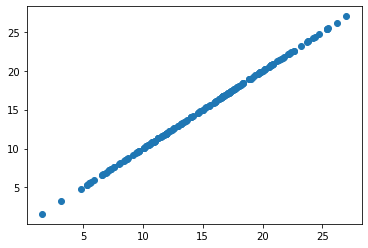

In [22]:
import matplotlib.pyplot as plt
predictions = cross_val_predict(lm2, data, y, cv=6)
plt.scatter(y, predictions)

👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍👍